In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics, preprocessing

In [3]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', 'Data')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
## Null values
df.isna().sum()


## No Null values
## Target Variable  Personal Loan

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [9]:
## Removing ID 
df = df.drop(columns='ID')

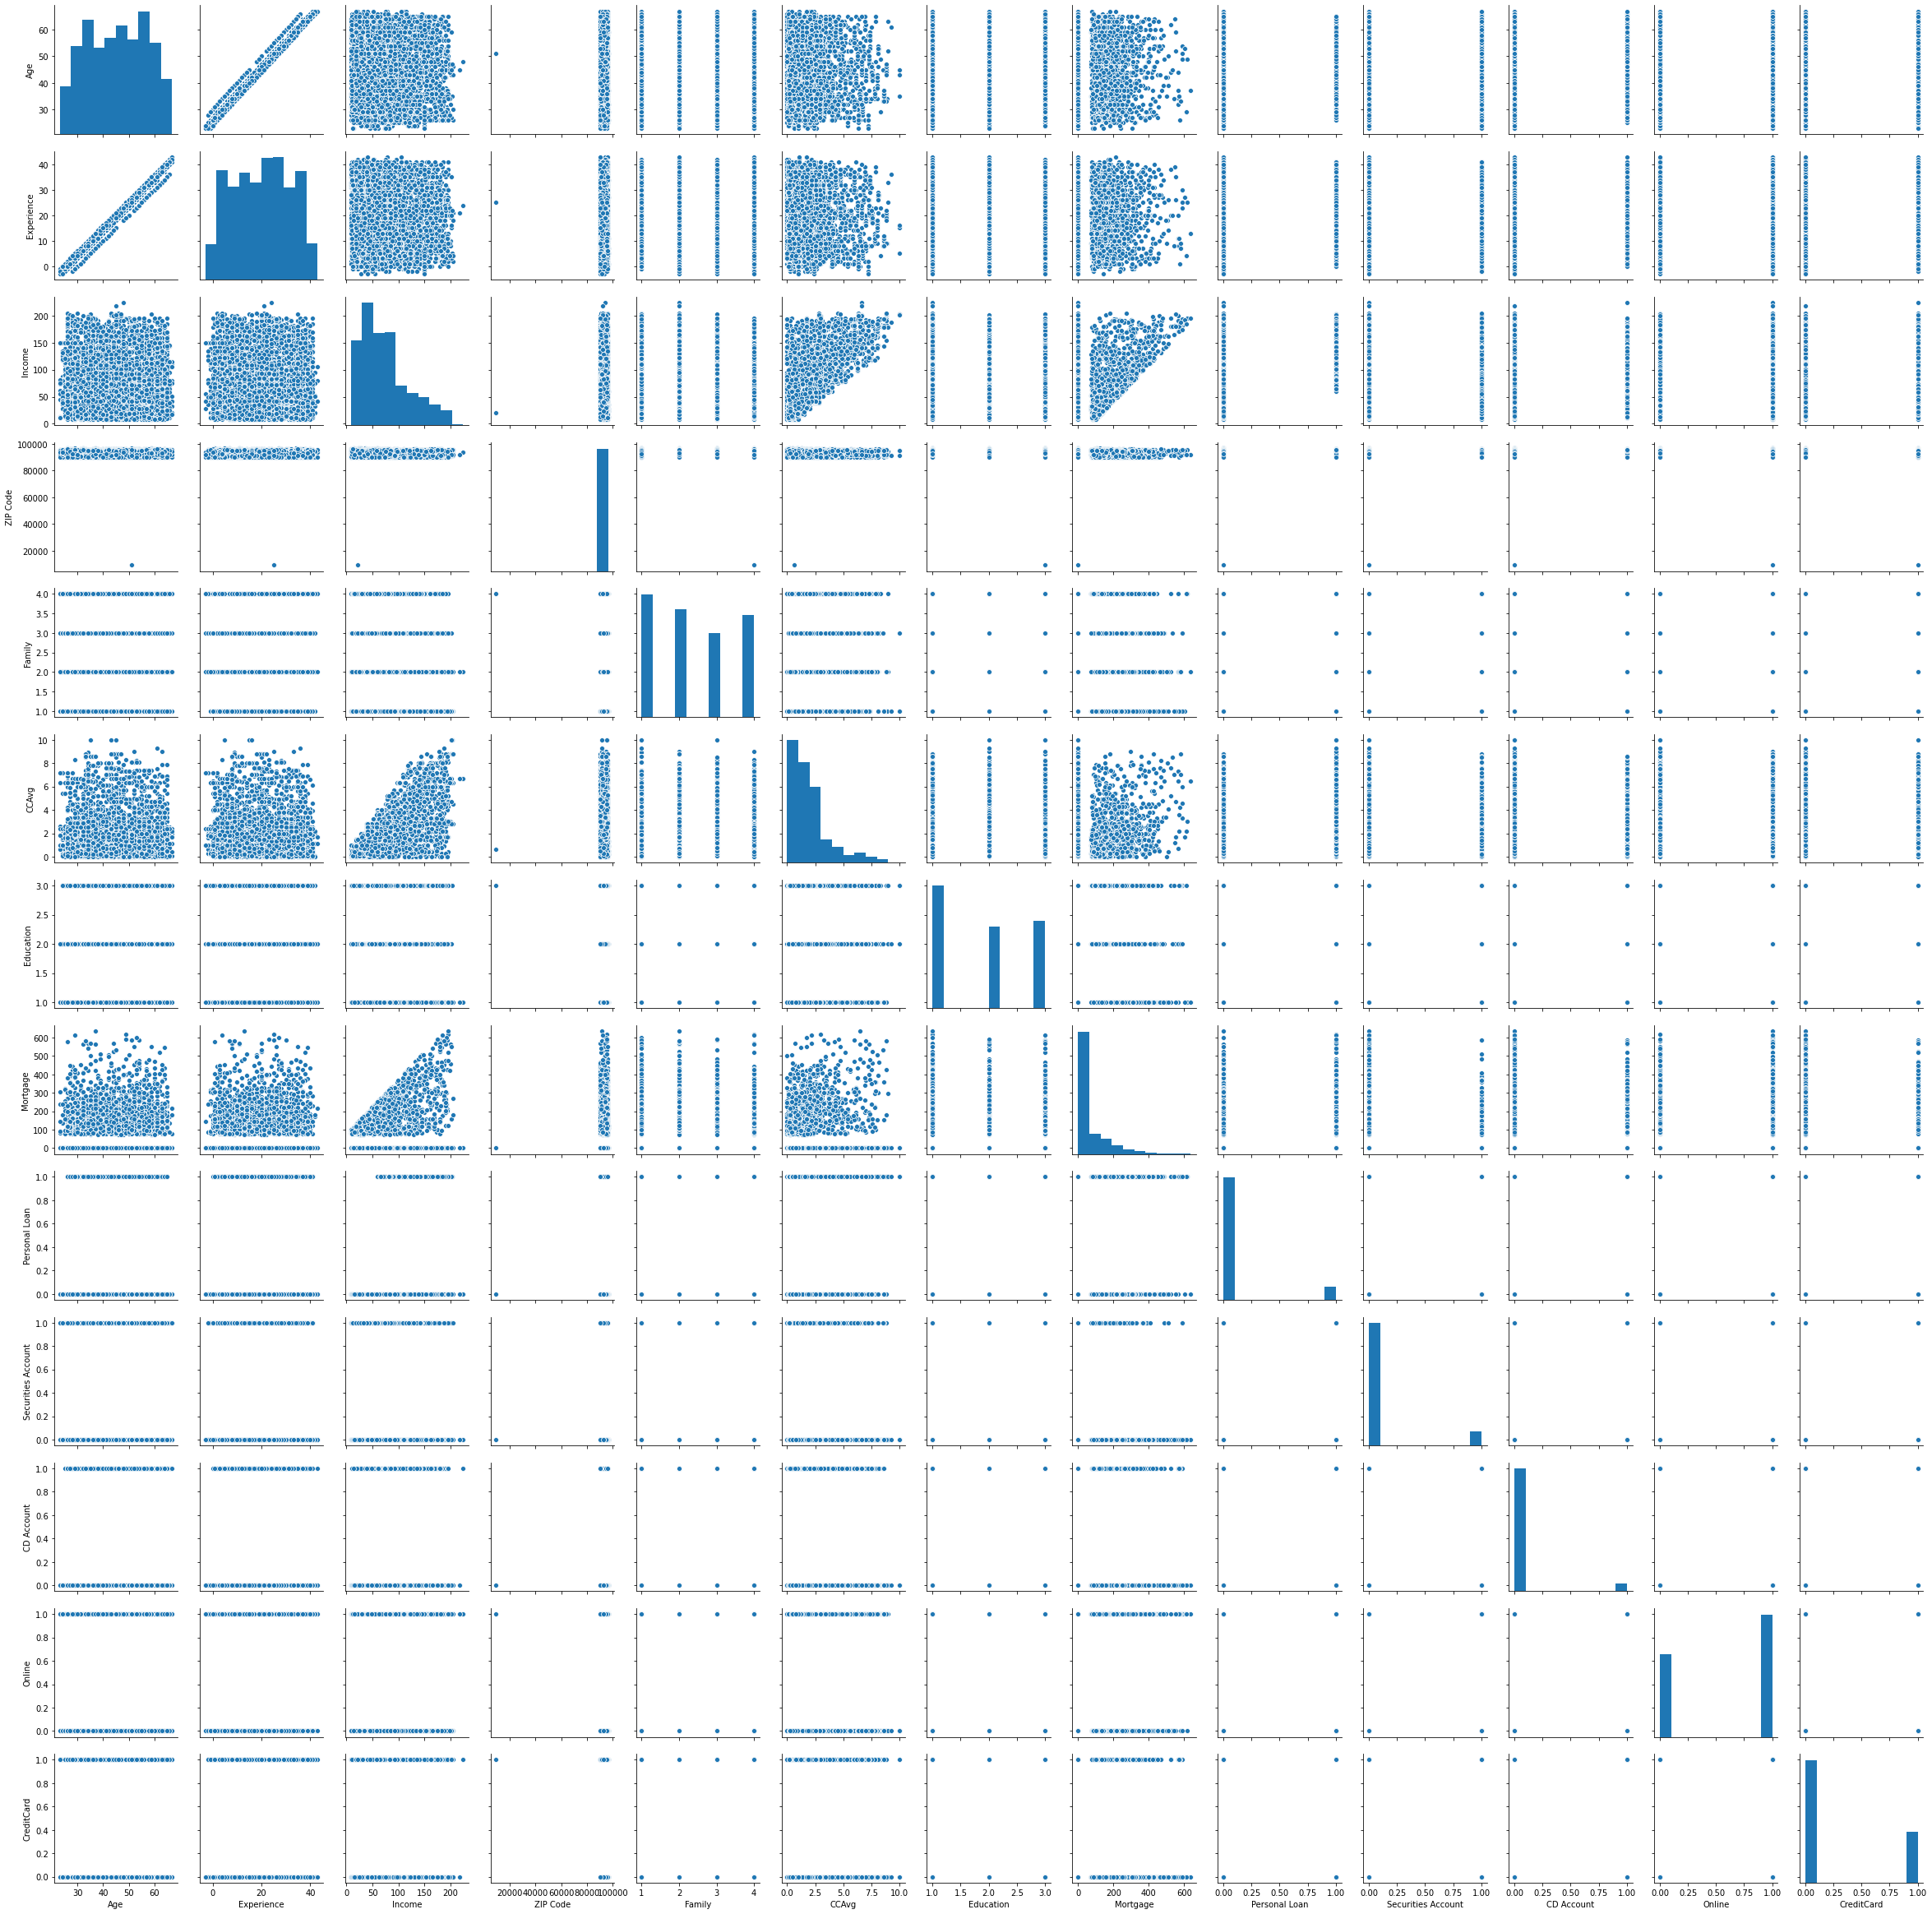

In [10]:
## Pairplot
sns.pairplot(df)

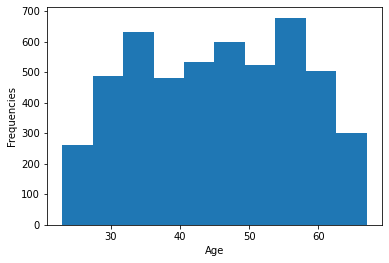

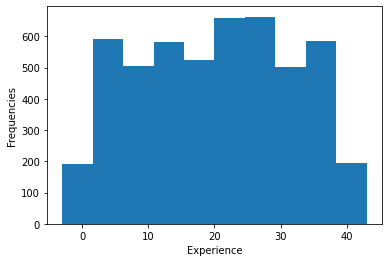

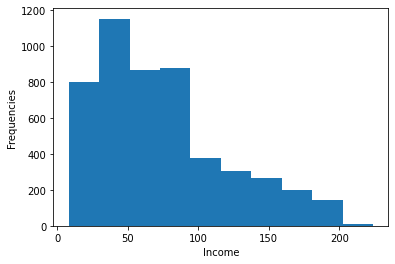

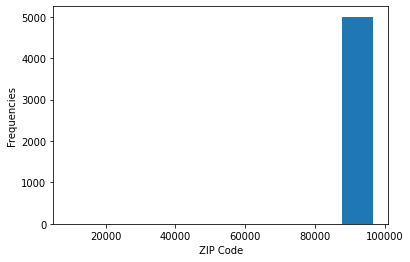

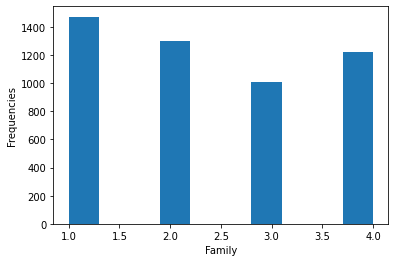

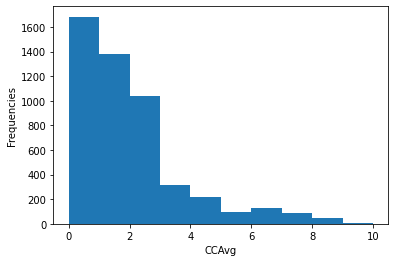

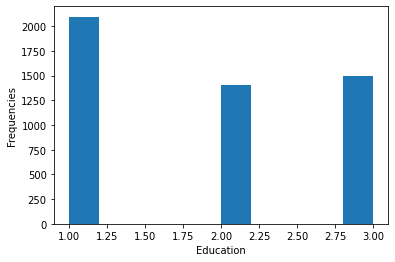

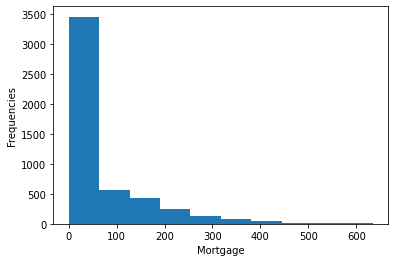

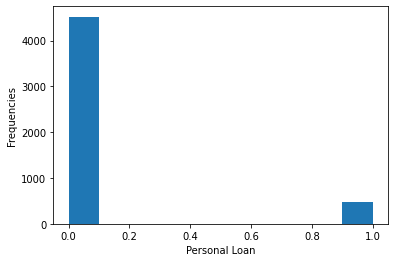

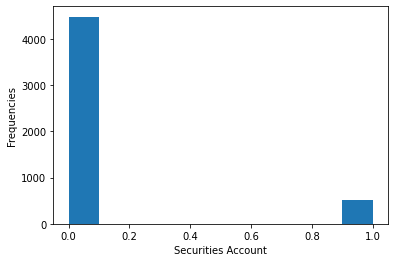

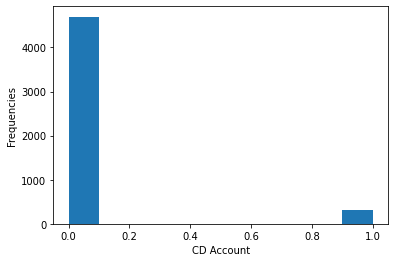

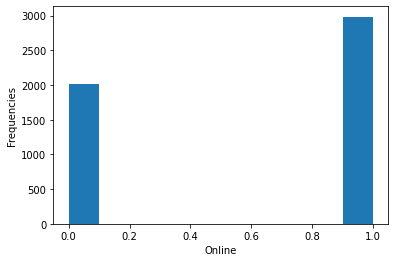

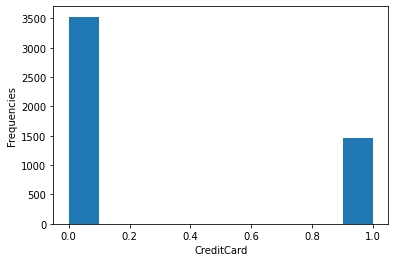

In [11]:
## PLotting Histogram
for column in df.columns:
    plt.hist(df[column],histtype='bar')
    plt.xlabel(column)
    plt.ylabel('Frequencies')
    plt.show()


In [12]:
## For checking Anamoly in DataFrame
conditions = {
    "Age" : (df.Age < 21) | (df.Age > 70),
    "Experience" : (df.Experience < 0)
}


for column in df.columns:
    if column in conditions.keys():
        print(column,df[conditions[column]].shape[0])

Age 0
Experience 52


In [13]:
abs(df[conditions['Experience']].corr()['Experience']).sort_values()

Education             0.081819
CreditCard            0.109637
Family                0.123395
Securities Account    0.128035
Mortgage              0.131459
Income                0.140927
Online                0.167959
CCAvg                 0.246624
Age                   0.310800
ZIP Code              0.331994
Experience            1.000000
Personal Loan              NaN
CD Account                 NaN
Name: Experience, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Experience'>

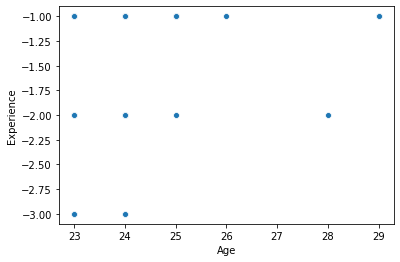

In [14]:
sns.scatterplot(x=df[conditions['Experience']]['Age'], y=df[conditions['Experience']]['Experience'])

In [15]:
groupbyAge = df[conditions['Experience']].groupby(['Age'])


In [16]:
df[~conditions['Experience']].groupby(['Age','Education']).median()

Experience  Income  ZIP Code  Family  CCAvg  Mortgage  \
Age Education                                                          
24  1                 0.0    85.0   93698.5     3.0   1.55       0.0   
    2                 0.0    39.5   92671.0     3.0   0.10       0.0   
    3                 0.0    38.0   93555.0     1.0   1.00       0.0   
25  1                 1.0    72.0   93010.0     4.0   1.60       0.0   
    2                 0.0    44.0   94545.0     2.0   1.70       0.0   
...                   ...     ...       ...     ...    ...       ...   
66  2                41.0    35.0   94590.0     4.0   0.60       0.0   
    3                41.0    48.5   93023.0     2.0   0.75       0.0   
67  1                41.0    41.0   91741.0     2.0   1.10       0.0   
    2                43.0    79.0   93711.0     4.0   1.70     182.0   
    3                41.5    55.0   94454.0     3.5   1.75       0.0   

               Personal Loan  Securities Account  CD Account  Online  \
Age Education                                                          
24  1                    0.0                 0.0         0.0     1.0   
    2                    0.0                 0.5         0.0     0.5   
    3                    0.0                 0.0         0.0     1.0   
25  1                    0.0                 0.0         0.0     1.0   
    2                    0.0                 0.0         0.0     0.0   
...                      ...                 ...         ...     ...   
66  2                    0.0                 0.0         0.0     1.0   
    3                    0.0                 0.0         0.0     0.5   
67  1                    0.0                 0.0         0.0     0.0   
    2                    0.0                 0.0         0.0     1.0   
    3                    0.0                 0.0         0.0     0.0   

               CreditCard  
Age Education              
24  1                 0.0  
    2                 0.0  
    3                 0.0  
25  1                 0.0  
    2                 0.0  
...                   ...  
66  2                 0.0  
    3                 1.0  
67  1                 0.0  
    2                 0.0  
    3                 0.5  

[132 rows x 11 columns]

In [17]:
df.corr()['Personal Loan'].sort_values()

Age                  -0.007726
Experience           -0.007413
ZIP Code              0.000107
CreditCard            0.002802
Online                0.006278
Securities Account    0.021954
Family                0.061367
Education             0.136722
Mortgage              0.142095
CD Account            0.316355
CCAvg                 0.366891
Income                0.502462
Personal Loan         1.000000
Name: Personal Loan, dtype: float64

In [18]:
### Above Observation shows that Personal Loan is positively corelated with Income and CCAvg

In [19]:
## Age and Experience are ver much corelated
## Dropping Experience

In [20]:
df = df.drop(columns='Experience')

In [21]:
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

### EDA
#### Influenece of the different parameters over Personal Loan

<AxesSubplot:xlabel='Family', ylabel='Income'>

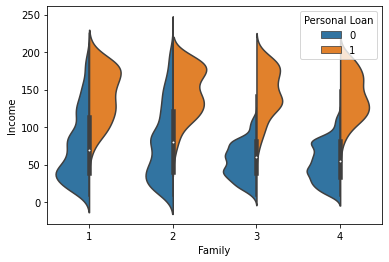

In [22]:
sns.violinplot(y=df['Income'], x=df['Family'], hue=df['Personal Loan'], split=True)

Observation - People having family size > 2 and income more than 110 are eligible for the loan

<AxesSubplot:xlabel='Family', ylabel='Mortgage'>

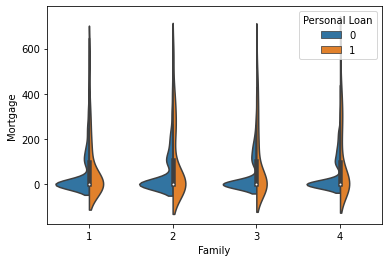

In [23]:
sns.violinplot(y=df['Mortgage'], x=df['Family'], hue=df['Personal Loan'], split=True)

<AxesSubplot:xlabel='Personal Loan', ylabel='CCAvg'>

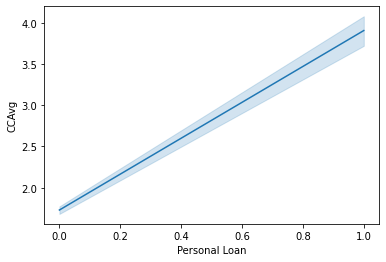

In [24]:
sns.lineplot(y='CCAvg',data=df,x='Personal Loan')

In [25]:
df[(df['Personal Loan'] == 0)]['CCAvg'].mean()

1.7289823008849559

In [26]:
df[(df['Personal Loan'] == 1)]['CCAvg'].mean()

3.9053472222222223

### Above Observations shows that people having high credit card average has higher chance of getting Personal Loan

# Machine Learning

In [27]:
## Lets try removing zip code and then run the model
df = df.drop(columns='ZIP Code', axis=1)

In [28]:
x = df.drop(columns='Personal Loan', axis=1)
y = df['Personal Loan']

In [29]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.2)

## Normal ML   Part - I

In [30]:
## Normal Modelling
from sklearn import tree, neighbors, svm, ensemble

/home/pranav/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Support Vector Machine

In [31]:
classifier = svm.SVC()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)


In [32]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

[[892   0]
 [100   8]]
0.9


### Decision Tree

In [33]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [34]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

[[886   6]
 [ 13  95]]
0.981


In [35]:
classifier.feature_importances_

array([0.02496677, 0.31712444, 0.14848044, 0.06314371, 0.3982428 ,
       0.01473627, 0.00176417, 0.01936543, 0.01059527, 0.0015807 ])

<AxesSubplot:>

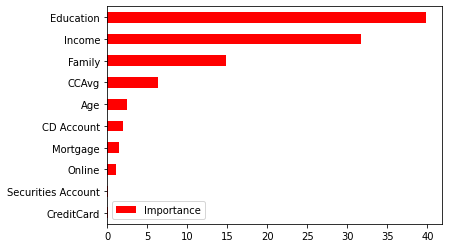

In [36]:
Importance = pd.DataFrame({'Importance':classifier.feature_importances_*100}, index=x.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

### RandomForestClassifier

In [37]:
classifier = ensemble.RandomForestClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [38]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))
classifier.get_params

[[889   3]
 [ 18  90]]
0.979


<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

<AxesSubplot:>

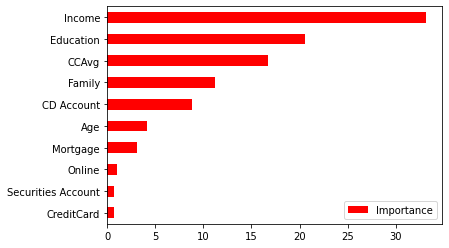

In [39]:
Importance = pd.DataFrame({'Importance':classifier.feature_importances_*100}, index=x.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

### K Nearest Neighbor Classifier

In [40]:
classifier = neighbors.KNeighborsClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [41]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

[[877  15]
 [ 76  32]]
0.909


## Normal ML   Part - II
#### Using Cross Fold Validation

In [42]:
dict_models = {
    'svc' : svm.SVC(),
    'dt' : tree.DecisionTreeClassifier(),
    'rt' : ensemble.RandomForestClassifier(),
    'neighbors' : neighbors.KNeighborsClassifier()
}

In [43]:
for model in dict_models.keys():
    accuracies = model_selection.cross_val_score(estimator=dict_models[model], X=x,y=y,cv=10)
    print("Accuracy in",model,"is",accuracies.mean()*100)

Accuracy in svc is 91.13999999999999
Accuracy in dt is 98.18
Accuracy in rt is 98.6
Accuracy in neighbors is 91.5


## Normal ML   Part - III
#### Using Feature Scaling

In [44]:
min_max_scaler = preprocessing.MinMaxScaler()
x_train_scaled = min_max_scaler.fit_transform(x_train)
y_test_scaled = min_max_scaler.fit_transform(x_test)

### SVM

In [45]:
classifier = svm.SVC()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [46]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

[[892   0]
 [100   8]]
0.9


As we can Observe that there isb no such effect of Feature Scaling in SVM Algorithm

### K Nearest Neighbor Classifier

In [47]:
classifier = neighbors.KNeighborsClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [48]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

[[877  15]
 [ 76  32]]
0.909


As we can Observe that there isb no such effect of Feature Scaling in KNearest Algorithm

## Normal ML   Part - IV
Parameter Tuning

### RandomForestClassifier

In [49]:
param = {
    'n_estimators' : [5,10,20,40,60,80],
    'max_depth' : [5,10,15,20,50,100],
    'min_samples_split' : [3,5,7,9,11,21,33],
    
}

In [50]:
classifier = ensemble.RandomForestClassifier()
grid_search_model = model_selection.GridSearchCV(classifier,param,verbose=2,cv=10)

In [51]:
grid_search_model.fit(x_train,y_train)

Fitting 10 folds for each of 252 candidates, totalling 2520 fits
[CV] max_depth=5, min_samples_split=3, n_estimators=5 ................
[CV] . max_depth=5, min_samples_split=3, n_estimators=5, total=   0.0s
[CV] max_depth=5, min_samples_split=3, n_estimators=5 ................
[CV] . max_depth=5, min_samples_split=3, n_estimators=5, total=   0.0s
[CV] max_depth=5, min_samples_split=3, n_estimators=5 ................
[CV] . max_depth=5, min_samples_split=3, n_estimators=5, total=   0.0s
[CV] max_depth=5, min_samples_split=3, n_estimators=5 ................
[CV] . max_depth=5, min_samples_split=3, n_estimators=5, total=   0.0s
[CV] max_depth=5, min_samples_split=3, n_estimators=5 ................
[CV] . max_depth=5, min_samples_split=3, n_estimators=5, total=   0.0s
[CV] max_depth=5, min_samples_split=3, n_estimators=5 ................
[CV] . max_depth=5, min_samples_split=3, n_estimators=5, total=   0.0s
[CV] max_depth=5, min_samples_split=3, n_estimators=5 ................
[CV] . max_d

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . max_depth=5, min_samples_split=3, n_estimators=5, total=   0.0s
[CV] max_depth=5, min_samples_split=3, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=3, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=3, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=3, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=3, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=3, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=3, n_estimators=10 ...............
[CV]  

[CV] . max_depth=5, min_samples_split=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, min_samples_split=5, n_estimators=5 ................
[CV] . max_depth=5, min_samples_split=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, min_samples_split=5, n_estimators=5 ................
[CV] . max_depth=5, min_samples_split=5, n_estimators=5, total=   0.0s
[CV] max_depth=5, min_samples_split=5, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_split=5, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=5, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_split=5, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=5, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=5, n_estimators=10 ...............
[CV]  

[CV]  max_depth=5, min_samples_split=7, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_split=7, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=7, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_split=7, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=7, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=7, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=7, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=7, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=7, n_estimators=10 ...............
[CV]  

[CV]  max_depth=5, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=9, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=9, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=9, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=9, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=9, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=9, n_estimators=10 ...............
[CV]  max_depth=5, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=9, n_estimators=10 ...............
[CV]  

[CV]  max_depth=5, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=11, n_estimators=10 ..............
[CV]  max_depth=5, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=11, n_estimators=10 ..............
[CV]  max_depth=5, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=11, n_estimators=10 ..............
[CV]  max_depth=5, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=11, n_estimators=10 ..............
[CV]  max_depth=5, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=11, n_estimators=10 ..............
[CV]  max_depth=5, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=11, n_estimators=10 ..............
[CV]  max_depth=5, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=11, n_estimators=10 ..............

[CV]  max_depth=5, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=21, n_estimators=10 ..............
[CV]  max_depth=5, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=21, n_estimators=10 ..............
[CV]  max_depth=5, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=21, n_estimators=10 ..............
[CV]  max_depth=5, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=21, n_estimators=10 ..............
[CV]  max_depth=5, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=21, n_estimators=10 ..............
[CV]  max_depth=5, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=21, n_estimators=10 ..............
[CV]  max_depth=5, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=21, n_estimators=10 ..............

[CV]  max_depth=5, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=33, n_estimators=10 ..............
[CV]  max_depth=5, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=33, n_estimators=10 ..............
[CV]  max_depth=5, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=33, n_estimators=10 ..............
[CV]  max_depth=5, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=33, n_estimators=10 ..............
[CV]  max_depth=5, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=33, n_estimators=10 ..............
[CV]  max_depth=5, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=33, n_estimators=10 ..............
[CV]  max_depth=5, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=5, min_samples_split=33, n_estimators=10 ..............

[CV]  max_depth=10, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=3, n_estimators=10 ..............

[CV]  max_depth=10, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=5, n_estimators=10 ..............

[CV]  max_depth=10, min_samples_split=7, n_estimators=5, total=   0.0s
[CV] max_depth=10, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=7, n_estimators=10 ..............


[CV]  max_depth=10, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=10, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=9, n_estimators=10 ..............

[CV]  max_depth=10, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=10, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=10, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=10, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=10, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=10, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=10, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=11, n_estimators=10 ......

[CV]  max_depth=10, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=10, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=10, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=10, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=10, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=10, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=10, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=21, n_estimators=10 ......

[CV]  max_depth=10, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=10, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=10, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=10, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=10, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=10, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=10, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=10, min_samples_split=33, n_estimators=10 ......

[CV]  max_depth=15, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=3, n_estimators=10 ..............

[CV]  max_depth=15, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=5, n_estimators=10 ..............

[CV]  max_depth=15, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=7, n_estimators=10 ..............

[CV]  max_depth=15, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=15, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=9, n_estimators=10 ..............

[CV]  max_depth=15, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=15, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=15, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=15, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=15, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=15, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=15, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=11, n_estimators=10 ......

[CV]  max_depth=15, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=15, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=15, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=15, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=15, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=15, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=15, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=21, n_estimators=10 ......

[CV]  max_depth=15, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=15, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=15, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=15, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=15, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=15, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=15, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=15, min_samples_split=33, n_estimators=10 ......

[CV]  max_depth=20, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=3, n_estimators=10 ..............

[CV]  max_depth=20, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=5, n_estimators=10 ..............

[CV]  max_depth=20, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=7, n_estimators=10 ..............

[CV]  max_depth=20, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=20, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=9, n_estimators=10 ..............

[CV]  max_depth=20, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=20, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=20, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=20, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=20, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=20, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=20, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=11, n_estimators=10 ......

[CV]  max_depth=20, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=20, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=20, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=20, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=20, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=20, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=20, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=21, n_estimators=10 ......

[CV]  max_depth=20, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=20, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=20, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=20, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=20, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=20, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=20, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=20, min_samples_split=33, n_estimators=10 ......

[CV]  max_depth=50, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=3, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=3, n_estimators=10 ..............

[CV]  max_depth=50, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=5, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=5, n_estimators=10 ..............

[CV]  max_depth=50, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=7, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=7, n_estimators=10 ..............

[CV]  max_depth=50, min_samples_split=9, n_estimators=5, total=   0.0s
[CV] max_depth=50, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=9, n_estimators=10 ..............
[CV]  max_depth=50, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=9, n_estimators=10 ..............


[CV]  max_depth=50, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=11, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=11, n_estimators=10 ......

[CV]  max_depth=50, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=21, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=21, n_estimators=10 ......

[CV]  max_depth=50, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=33, n_estimators=10 .............
[CV]  max_depth=50, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=50, min_samples_split=33, n_estimators=10 ......

[CV]  max_depth=100, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=3, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=3, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=3, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=3, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=3, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=3, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=3, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=3, n_estimators=10 ......

[CV]  max_depth=100, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=5, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=5, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=5, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=5, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=5, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=5, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=5, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=5, n_estimators=10 ......

[CV]  max_depth=100, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=7, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=7, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=7, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=7, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=7, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=7, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=7, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=7, n_estimators=10 ......

[CV]  max_depth=100, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=9, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=9, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=9, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=9, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=9, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=9, n_estimators=10 .............
[CV]  max_depth=100, min_samples_split=9, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=9, n_estimators=10 ......

[CV]  max_depth=100, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=11, n_estimators=10 ............
[CV]  max_depth=100, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=11, n_estimators=10 ............
[CV]  max_depth=100, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=11, n_estimators=10 ............
[CV]  max_depth=100, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=11, n_estimators=10 ............
[CV]  max_depth=100, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=11, n_estimators=10 ............
[CV]  max_depth=100, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=11, n_estimators=10 ............
[CV]  max_depth=100, min_samples_split=11, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=11, n_estimators=1

[CV]  max_depth=100, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=21, n_estimators=10 ............
[CV]  max_depth=100, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=21, n_estimators=10 ............
[CV]  max_depth=100, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=21, n_estimators=10 ............
[CV]  max_depth=100, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=21, n_estimators=10 ............
[CV]  max_depth=100, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=21, n_estimators=10 ............
[CV]  max_depth=100, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=21, n_estimators=10 ............
[CV]  max_depth=100, min_samples_split=21, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=21, n_estimators=1

[CV]  max_depth=100, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=33, n_estimators=10 ............
[CV]  max_depth=100, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=33, n_estimators=10 ............
[CV]  max_depth=100, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=33, n_estimators=10 ............
[CV]  max_depth=100, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=33, n_estimators=10 ............
[CV]  max_depth=100, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=33, n_estimators=10 ............
[CV]  max_depth=100, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=33, n_estimators=10 ............
[CV]  max_depth=100, min_samples_split=33, n_estimators=10, total=   0.0s
[CV] max_depth=100, min_samples_split=33, n_estimators=1

[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:  4.8min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 20, 40, 60, 80], 'max_depth': [5, 10, 15, 20, 50, 100], 'min_samples_split': [3, 5, 7, 9, 11, 21, 33]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [52]:
print(grid_search_model.best_params_)
clf = grid_search_model.best_estimator_
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

{'max_depth': 100, 'min_samples_split': 3, 'n_estimators': 60}


In [53]:
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

[[887   5]
 [ 12  96]]
0.983


<AxesSubplot:>

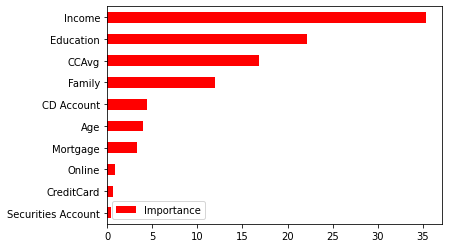

In [55]:
Importance = pd.DataFrame({'Importance':clf.feature_importances_*100}, index=x.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )